## Assignment 3: Evaluating Classification Models
NOTE : PLEASE DO NOT POST/SHARE THE CODE OR YOUR SOLUTIONS ON THE WEB/GIT except CANVAS FOR GRADING

References : 
https://rpubs.com/MatthewDSmith22/634473
https://medium.com/@ogbeide331/bank-marketing-campaign-prediction-using-logistic-regression-d3a1072ac155
https://github.com/prakhardogra921/Bank-Marketing-Classification#readme
https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226


Problem Statement : The bank is interested in identifying factors that affect client responses to new term deposit offerings, which are the focus of the marketing campaigns. What kinds of clients are most likely to subscribe to new term deposits? In other words, identify the list of banking clients that appear to be the best target for direct marketing efforts 

Background Materials/Data: Bank Marketing Study
For this assignment you are asked to fit classification models to data from the Bank Marketing Study, as described in the miller_mds_bank_marketing_study-1.pdf handout.

Instructions:
Use three binary explanatory variables relating to client banking history: default, housing, and loan. 
- Predict the binary response variable: Has the client subscribed to a term deposit? 
- Use all banking client observations with complete data for these study variables. 

Employ atleast two of the below classification methods: 
(1) logistic regression 
(2) naïve Bayes classification. 
(3) SVM
Evaluate each of the models’ assumptions. Conduct hyperparameter tuning for the SVM kernel(if used). Evaluate goodness of fit metrics including TPR, FPR, precision, recall, and accuracy on the training and validation sets. Build ROC and Precision / Recall graphs. Evaluate your models' performance on the validation set using the F1-score. 


Regarding the management problem, imagine that you are advising the bank about machine learning methods to guide telephone marketing campaigns: 
- Which of the two modeling methods would you recommend and why? 
- And, given the results of your research, which group (based on attributes) of banking clients appears to be the best target for direct marketing efforts? 

 
Deliverables and File Formats
- Python notebook that address the problem and the writeup as indicated towards the end of this notebook (Audience:Director Data Science/Analytics)

Optional (Audience:Business/C-Suite) - Additional 20 points
1. Provide a double-spaced paper with a two-page maximum for the text. The paper in pdf format should include 
    (1) Summary and problem definition for management; 
    (2) Discussion of the methodology, data findings and traditional machine learning methods employed; 
    (3) List assumptions, programming work, issues along with model evaluation metrics; and 
    (4) Review of results/ insight swith recommendations for management.

Formatting Python Code
Refer to Google’s Python Style Guide (https://google.github.iostyleguide/pyguide.html) for ideas about formatting Python code:


NOTE : 
- Below is the starter code and please feel free to update/edit/change to provide your thoughts/solutions to the problem. 
- Comment often and in detail, highlighting major sections of code, describing the thinking behind the programming methods being employed.
- This code has a lot of errors (intentionally, including the data dictionary) make sure to updated all the cells based on best practices along with your analysis/findings.


GRADING GUIDELINES (100 points)
--------------------------------
(1) Data preparation, exploration, visualization (20 points)
(2) Review research design and modeling methods (20 points)
(3) Review results, evaluate models (20 points)
(4) Implementation and programming (20 points)
(5) Exposition, problem description, and management recommendations (20 points)


In [1]:
# Bank Marketing Study as described in Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python (Miller 2015)
# https://www.amazon.com/Marketing-Data-Science-Techniques-Predictive/dp/0133886557 

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [3]:
###Loading Packages###
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pickle
from matplotlib import pyplot

# import base packages into the namespace for this program
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from pandas.plotting import scatter_matrix

# import sklearn packages 
from sklearn.metrics import make_scorer, roc_auc_score, classification_report, confusion_matrix, f1_score, \
precision_score, recall_score, precision_recall_curve, auc
from sklearn import linear_model, metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import PowerTransformer

# import of smote for imbalanced dataset
from imblearn.over_sampling import SMOTE

In [4]:
# output of plotting commands is displayed inline directly below the code cell that produced it
%matplotlib inline

In [5]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 42

In [6]:
# #S2 Mount Google Drive to Colab Enviorment
# from google.colab import drive
# drive.mount('/content/gdrive')

In [7]:
# #S3 Establish working directory
# import os # Operation System
# os.getcwd()
# %cd /content/gdrive/My Drive/Assignments/3/
# !pwd
# !ls
# print('Working Directory')
# print(os.getcwd())
# work_dir = "/content/gdrive/My Drive/Assignments/3/"

In [8]:
# initial work with the data set
# bank = pd.read_csv(work_dir+'./data/bank.csv', sep = ';')
bank = pd.read_csv('bank.csv', sep = ';')

# print first few rows of df 
bank.head()
bank.info()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  response   4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
# examine the shape of original input data
print(bank.shape)

(4521, 17)


In [10]:
# # drop observations with missing data, if any
# bank.dropna()

# examine the shape of original input data
bank.shape

(4521, 17)

In [11]:
# look at the list of column names, note that y is the response
list(bank.columns.values)

# look at the beginning of the DataFrame
bank.head()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [12]:
# Descriptive Statistics for non-categorical variables
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


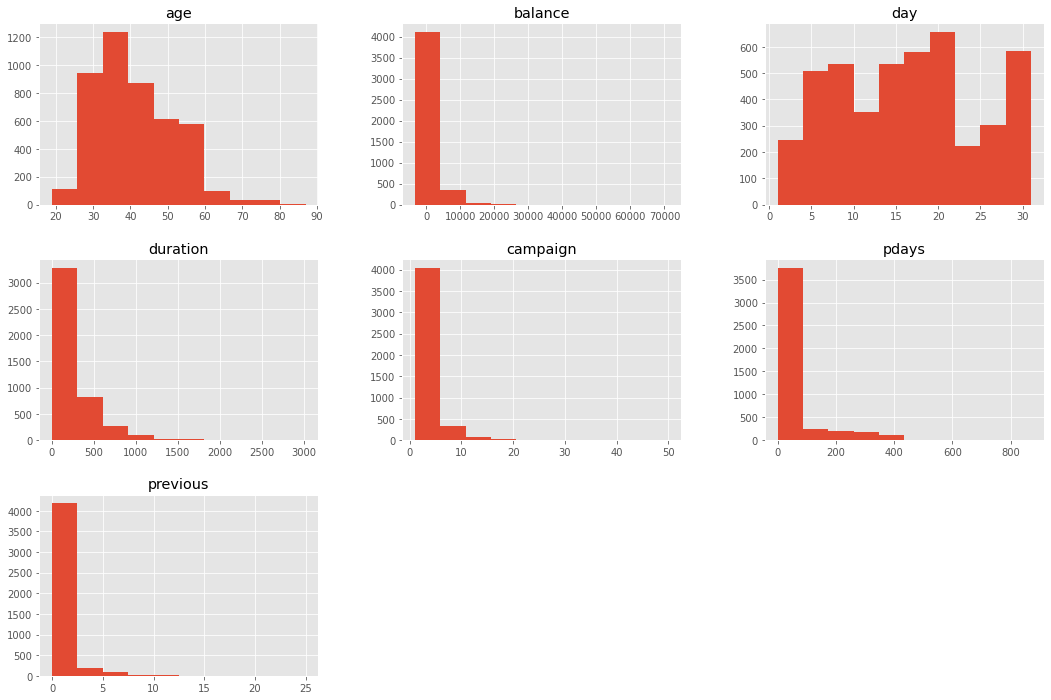

In [13]:
# Check distributions of non-categorical variables
bank.hist(figsize=(18,12));

In [14]:
bank['response'].value_counts()

no     4000
yes     521
Name: response, dtype: int64

<Figure size 432x288 with 0 Axes>

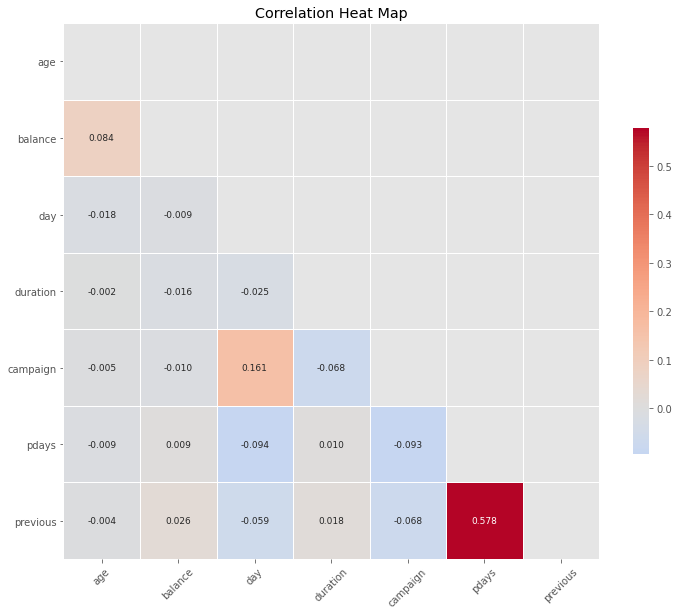

In [15]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

# examine correlations
corr_chart(df_corr = bank) 

In [16]:
# mapping function to convert text no/yes to integer 0/1
convert_to_binary = {'no' : 0, 'yes' : 1}

# define binary variable for having credit in default
default = bank['default'].map(convert_to_binary)

# define binary variable for having a mortgage or housing loan
housing = bank['housing'].map(convert_to_binary)

# define binary variable for having a personal loan
loan = bank['loan'].map(convert_to_binary)

# define response variable to use in the model
response = bank['response'].map(convert_to_binary)

# gather three explanatory variables and response into a numpy array 
# here we use .T to obtain the transpose for the structure we want
model_data = np.array([np.array(default), np.array(housing), np.array(loan), 
    np.array(response)]).T

# examine the shape of model_data, which we will use in subsequent modeling
print(model_data.shape)

(4521, 4)


In [17]:
#Check "model_data" structure
print(model_data)

[[0 0 0 0]
 [0 1 1 0]
 [0 1 0 0]
 ...
 [0 0 0 0]
 [0 0 0 0]
 [0 1 1 0]]


In [18]:
# Check the frequency of "default", "loan", "housing" by "response"
(pd.crosstab([bank['default'],bank['loan'],bank['housing']], [bank['response']], margins=True))

# pd.crosstab([bank['default'],bank['loan'],bank['housing']],columns=bank['response'])

# # Check the frequency of "default", "loan", "housing" by "response"
# print(pd.crosstab([bank['default'],bank['loan'],bank['housing']], [bank['response']], margins=True))

response                no  yes   All
default loan housing                 
no      no   no       1381  279  1660
             yes      1927  192  2119
        yes  no        255   16   271
             yes       370   25   395
yes     no   no         13    4    17
             yes        31    3    34
        yes  no         12    2    14
             yes        11    0    11
All                   4000  521  4521

In [19]:
ct = (pd.crosstab([bank['default'],bank['loan'],bank['housing']], 
                  [bank['response']], margins=True))
ct_nm = (pd.crosstab([bank['default'],bank['loan'],bank['housing']], 
                  [bank['response']], margins=False))
ct2 = pd.crosstab(bank.response,bank.default)
ct3 = pd.crosstab(bank.response,bank.loan)
ct4 = pd.crosstab(bank.response,bank.housing)

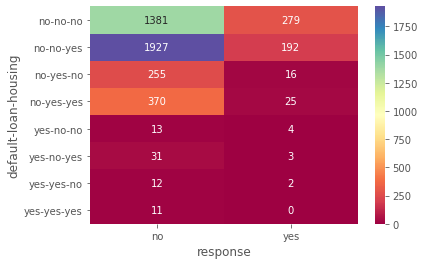

<Figure size 432x288 with 0 Axes>

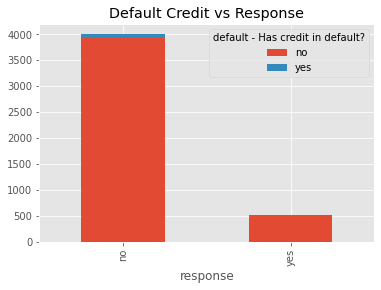

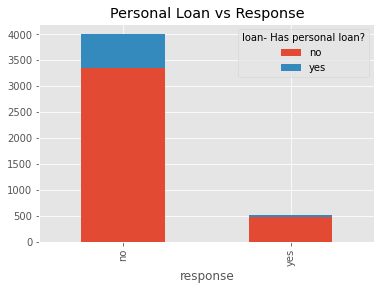

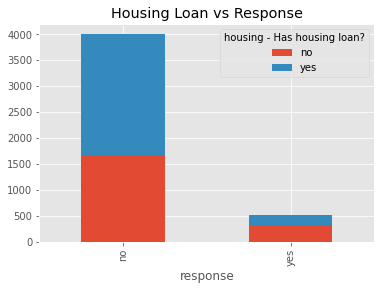

In [20]:
plt.figure()
sns.heatmap(ct_nm,cmap="Spectral", annot=True, cbar=True,fmt='g');

plt.figure()
ct2.plot.bar(stacked=True)
plt.legend(title='default - Has credit in default?')
plt.title("Default Credit vs Response")
plt.show();

ct3.plot.bar(stacked=True)
plt.legend(title='loan- Has personal loan?')
plt.title("Personal Loan vs Response")
plt.show();

ct4.plot.bar(stacked=True)
plt.legend(title='housing - Has housing loan?')
plt.title("Housing Loan vs Response")
plt.show();


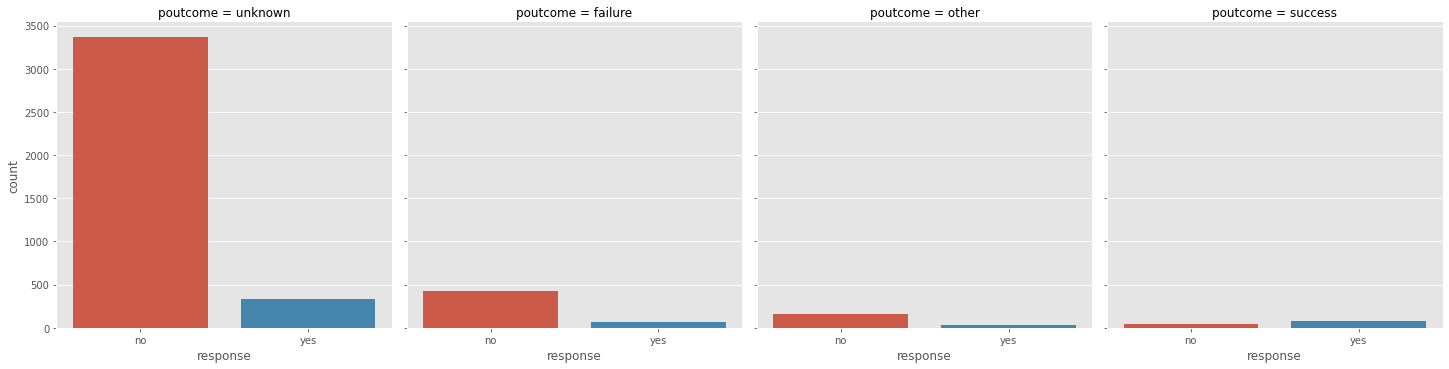

In [21]:
sns.catplot(x="response", col="poutcome", data=bank, kind="count")

####  The rest of the program should set up the modeling methods & evaluation within a cross-validation design

In [22]:
# shuffle is by the first index, which is the rows
np.random.seed(RANDOM_SEED)
# np.random.shuffle(model_data)

# dimensions of the additive model X input and y response
print('\nData dimensions:', model_data.shape)

# --------------------------------------------------------


Data dimensions: (4521, 4)


## Convert np.array to pandas df for modeling, as it is easier to work with

In [23]:
model_df = pd.DataFrame({'Default': model_data[:, 0], 'Housing': model_data[:, 1], 'Loan': model_data[:, 2], 'Response': model_data[:, 3]})
model_df.head()

,Default,Housing,Loan,Response
0,0,0,0,0
1,0,1,1,0
2,0,1,0,0
3,0,1,1,0
4,0,1,0,0


## Split Dataset into test/train, check to ensure spilt and binary ratios match between train and test data

In [24]:
X = model_df.iloc[:, 0:3]
y = model_df.iloc[:, 3]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

# check split of data
len(x_train), len(y_train), len(x_test), len(y_test), len(model_df)

(3616, 3616, 905, 905, 4521)

In [25]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.884679
1    0.115321
Name: Response, dtype: float64
0    0.885083
1    0.114917
Name: Response, dtype: float64


## Employ SMOTE on dataset. We are using SMOTE because of the imbalance in the response variable. This is an oversampling technique

In [26]:
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)

# check shape of x_train and y_train, and new response variable ratio
print(x_train.shape)
print(y_train.shape)
print(y_train.value_counts(normalize = True))

(6398, 3)
(6398,)
0    0.5
1    0.5
Name: Response, dtype: float64


## Develop individual models, employing hyperparameter tuning and cross-validation within each function

## Model 1: Logistic Regression 

In [27]:
def createRandomGrid():
    # hyperparameters for logistic regression
    C = np.logspace(-4, 4, 50)
    penalty = ['none', 'l1', 'l2', 'elasticnet']
    solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    
    random_grid = {"C": C ,
             "penalty": penalty, 
             "solver": solver
              }
        
    
    return random_grid

def runCLF(random_grid, x_train, y_train):
    
    #rmse_score = make_scorer(rmse, greater_is_better = False)
    
    clf = linear_model.LogisticRegression(random_state=RANDOM_SEED)
    #cv_method = RepeatedStratifiedKFold(n_splits=10,  n_repeats=3, random_state=RANDOM_SEED)
    grid_search = GridSearchCV(clf, random_grid, cv=10, scoring='roc_auc', n_jobs = -1)
    grid_search.fit(x_train, y_train)
    final = grid_search.best_params_
    print(final)
    print(grid_search.best_score_)
    return grid_search.best_estimator_

param_set = createRandomGrid()
best_clf_model = runCLF(param_set, x_train, y_train)
best_clf_model.fit(x_train,y_train)
pickle.dump(best_clf_model, open("clf.pkl", 'wb'))

{'C': 0.040949150623804234, 'penalty': 'l2', 'solver': 'liblinear'}
0.6057928187451018


LogisticRegression(C=0.040949150623804234, random_state=42, solver='liblinear')

## ROC Graph: Logistic Regression

Resrouces: https://github.com/finnqiao/bank-logistic/blob/master/bank-logistic-v2.ipynb

In [28]:
def roc_curve(model):
    probs = model.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

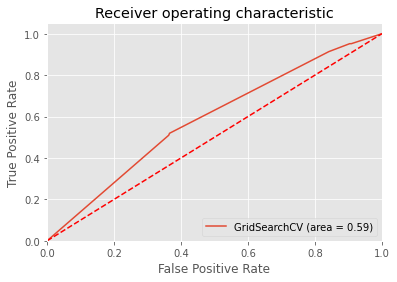

In [29]:
roc_curve(best_clf_model)

## Precision-Recall Graph: Logistic Regression

Resources: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

In [30]:
def pr_graph(model):
    # predict probabilities
    lr_probs = model.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # predict class values
    yhat = model.predict(x_test)
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
    lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

    # plot the precision-recall curves
    no_skill = len(y_test[y_test==1]) / len(y_test)
    pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

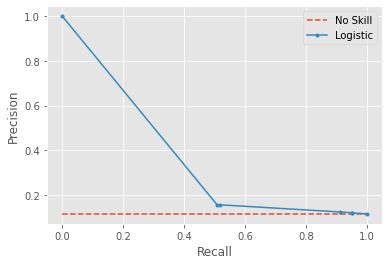

In [31]:
pr_graph(best_clf_model)

## Naïve Bayes Classification

In [32]:
# establish Naive Bayes model
nbc = GaussianNB()

# Establish CV method and hyperparameter boundaries 
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=RANDOM_SEED)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

nbc_gs = GridSearchCV(estimator=nbc, param_grid=params_NB, cv=cv_method, verbose=1, scoring='roc_auc')

# Transform x_test variables using PowerTransformer
Data_transformed = PowerTransformer().fit_transform(x_train)

nbc_gs.fit(Data_transformed, y_train);
print ("Best Model Parameters:", nbc_gs.best_params_)
print ("Best GNB Score:",nbc_gs.best_score_)

# pickle model for later use 
pickle.dump(nbc_gs, open("nbc.pkl", 'wb'))

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.000e+00, 8.111e-01, 6.579e-01, 5.337e-01, 4.329e-01, 3.511e-01,
       2.848e-01, 2.310e-01, 1.874e-01, 1.520e-01, 1.233e-01, 1.000e-01,
       8.111e-02, 6.579e-02, 5.337e-02, 4.329e-02, 3.511e-02, 2.848e-02,
       2.310e-02, 1.874e-02, 1.520e-02, 1....
       1.000e-06, 8.111e-07, 6.579e-07, 5.337e-07, 4.329e-07, 3.511e-07,
       2.848e-07, 2.310e-07, 1.874e-07, 1.520e-07, 1.233e-07, 1.000e-07,
       8.111e-08, 6.579e-08, 5.337e-08, 4.329e-08, 3.511e-08, 2.848e-08,
       2.310e-08, 1.874e-08, 1.520e-08, 1.233e-08, 1.000e-08, 8.111e-09,
       6.579e-09, 5.337e-09, 4.329e-09, 3.511e-09, 2.848e-09, 2.310e-09,
       1.874e-09, 1.520e-09, 1.233e-09, 1.000e-09])},
             scoring='roc_auc', verbose=1)

Best Model Parameters: {'var_smoothing': 1.0}
Best GNB Score: 0.6036890061069542


## ROC Graph: Naïve Bayes Classification

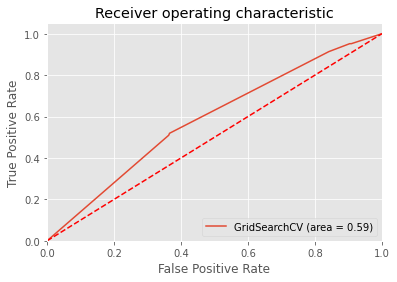

In [33]:
roc_curve(nbc_gs)

## Precision-Recall Graph: Naïve Bayes Classification

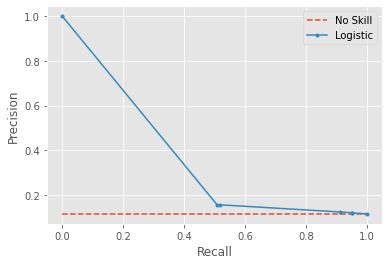

In [34]:
pr_graph(nbc_gs)

### Retrieve optimized models for each modeling type that were pickled

In [35]:
clf_model = pickle.load(open("clf.pkl", 'rb'))
nbc_model = pickle.load(open("nbc.pkl", 'rb'))

### Create RMSE and Brier Score function for additional scoring metrics

In [36]:
def rmse(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)

    distance = predict - actual

    square_distance = distance ** 2

    mean_square_distance = square_distance.mean()

    score = np.sqrt(mean_square_distance)

    return score

rmse_score = make_scorer(rmse, greater_is_better = False)
features = x_train.columns

In [37]:
def brier_score(y_test, y_pred):
    return (1 / len(y_pred)) * sum((y_pred - y_test)**2)

### Pass models of interest through pipeline that will apply different scoring methodologies to train, CV, and test sets

In [38]:
model_list = [clf_model, nbc_model]
model_names = ["Logistic Regression", "Naive Bayes"]
roc_auc_list = []
results_df_list = []
for i in range(2):
    model = model_list[i]
    model_name = model_names[i]
    y_test_predictions =  model.predict(x_test)
    y_train_predictions = model.predict(x_train)

#     rmse_test = math.sqrt(mean_squared_error(y_test, y_test_predictions))
#     rmse_train = math.sqrt(mean_squared_error(y_train, y_train_predictions))
    roc_auc_test = roc_auc_score(y_test, y_test_predictions)
    roc_auc_train = roc_auc_score(y_train, y_train_predictions)
    cv_scores = cross_val_score(model, x_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1)
    roc_auc_cv = cv_scores.mean()
    f1 = f1_score(y_test, y_test_predictions)
    # we will not be using a voting classifier model for the purposes of this assignment 
    if(model_name == 'VotingClassifier'):
        brier = np.nan
    else:
        y_test_pred_prob = model.predict_proba(x_test)[:, 1]
        brier = brier_score(y_test, y_test_pred_prob)
    precision_test = precision_score(y_test, y_test_predictions)
    recall_test = recall_score(y_test, y_test_predictions)
    cf = confusion_matrix(y_test, y_test_predictions)
    cf = cf.flatten()
    TPR = cf[3]/(cf[3]+cf[1])
    FPR = cf[2]/(cf[2]+cf[0])

    roc_auc_list.append([model_name,roc_auc_train,roc_auc_cv, roc_auc_test, f1, brier, precision_test, recall_test, 
                         cf[0], cf[1], cf[2], cf[3],TPR, FPR])
    
    y_test = np.array(list(y_test))
    y_test_predictions = np.array(y_test_predictions)
    dfi = pd.DataFrame({'Actual IR': y_test, 'Predicted IR': y_test_predictions})
    results_df_list.append(dfi)

### Output of scoring metrics for models of interest. This includes ROC AUC, F1, Brier Score, Precision, Recall and confusion matrix outputs

In [39]:
roc_auc_df = pd.DataFrame(roc_auc_list, columns = ["Model Name", "Train ROC AUC", "CV ROC AUC", "Test ROC AUC", 
                                                   'Test F1 Score', 'Brier Score', 'Test Precision', 'Test Recall', 
                                                   'Test TN', 'Test FN', 'Test FP', 'Test TP', 'TPR', 'FPR'])
roc_auc_df.sort_values(by=['Test ROC AUC'], ascending = False)

,Model Name,Train ROC AUC,CV ROC AUC,Test ROC AUC,Test F1 Score,Brier Score,Test Precision,Test Recall,Test TN,Test FN,Test FP,Test TP,TPR,FPR
0,Logistic Regression,0.594561,0.605793,0.576719,0.239468,0.243936,0.15562,0.519231,508,293,50,54,0.15562,0.089606
1,Naive Bayes,0.524070,0.605667,0.521530,0.212675,0.283012,0.11971,0.951923,73,728,5,99,0.11971,0.064103


### Bank Marketing Study: 
Imagine that you are advising the bank about machine learning methods to guide telephone marketing campaigns: 
- Which of the two modeling methods would you recommend and why? 
- And, given the results of your research, which group of banking clients appears to be the best target for direct marketing 
  efforts? 

#### REPORT/FINDINGS: 

##### (1) A summary and problem definition for management; 


---
##### (2) Discussion of the methodology, data findings and traditional machine learning methods employed; 


---
##### (3) List assumptions, programming work, issues along with model evaluation metrics; and 


---
##### (4) Review of results/ insight swith recommendations for management


### (1) A summary and problem definition for management

Summary: The bank is looking to employ machine learning methodologies to optimize how they target perspective clients via new term deposit offerings. This will be completed by attempting to identify and target clients that are most likely to respond to marketing efforts via a classification model attempting to answer if a prespective client will respond to new offerings. 

Problem Definition: The bank is interested in identifying factors that affect client responses to new term deposit offerings, which are the focus of the marketing campaigns. What kinds of clients are most likely to subscribe to new term deposits? In other words, identify the list of banking clients that appear to be the best target for direct marketing efforts. 

### (2) Discussion of the methodology, data findings and traditional machine learning methods employed;

Methodology: Per the instructions given, the methodology employed was to use the three binary indicators from the original dataset to use as input variables: Default, Housing, Loan. Once these variables were converted to binary indicators, other features were stripped from the dataset and we were left with the three binary indicators and the output variable: Reponse to campaign. 

Data Findings: Using the features identified in the instructions, the only major data findings was that we have a highly imbalanced response variable (approximately 88% no response). Because of this, an oversampling technique called SMOTE to balance the reponse variable for better modeling outputs. 

Machine Learning Mehods Employed: The machine learning classification methods utilized include a logsitic regression model, a Naive Bayes Model, and a SVM mode (via SVC). 

### (3) List assumptions, programming work, issues along with model evaluation metrics
Assumptions: The primary assumption here was that, per the instructions, we should only use the binary indicator variables within the banking dataset. If we were to use all available features within the dataset, the scoring would most likely improve by a large amount. Given that the instructions identify Precision, Recall, and AUC, I made the assumption that these were the primary metrics of interest for evaluation. 

Programming Work/Issues: The bulk of the programming work centered around tuning models for optimized hyperparamters and development of the assocaited scoring pipeline. Additional components included prepping and cleaning the dataset for modeling along with employing SMOTE to the training dataset.

Model Evaluation Metrics: I decided to use an exhausitive scoring pipeline to review a number of different evalutaion metrics. However, given that the instructions identify Precision, Recall, and AUC, I made the assumption that these were the primary metrics of interest for evaluation.

### (4) Review of results/ insight swith recommendations for management

Review of results/ insight: While the Logistic Regression model performs slightly better in ROC and Precision scoring, because recall is so much better within recall (95% compared to 51%) I would recommend the use of the Naive Bayes model. Recall is important in this case because we want to make sure we have a strong understanding of who will respond to our campaign (True Positives). The Naive Bayes model is much better at giving us this information over the Logistic Regression Model. 

Recommendations for management: I would reccommend initially employing the Naive Bayes model within a larger sample size to continue improvement of scoring on the original model. I would also recommend the inclusion of all variables within the dataset, which will vastly improve scoring components within the dataset.